In [15]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

# Initialising the CNN
classifier = Sequential()
#padding='same  keep same dim of i/p,paddding='valid' element extra dim  so loss of data happens
#link  https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow
#fine tuning  1st half freeze remaining trainable
# Step 1 - Convolution
classifier.add(Conv2D(64, (3, 3), input_shape = (64, 64, 3), activation = 'relu')) #3 is no of channels ,64 is dim of 2d array in each channel
#32 is fliters(feature detector), 3,3 is row and col of feature detector
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2))) #without these get large features then very high compattue but  not loose performance and info
classifier.add(Dropout(0.2))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu')) #already know size, already have so no need I/P
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))
classifier.add(Conv2D(16, (3, 3), activation = 'relu')) #already know size, already have so no need I/P
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))
# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dropout(0.2))
# Step 4 - Full connection
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, #add new images ,best performance reduce overfitting
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory("E:\\github\\my upload\\covid\\x ray\\COVID_19_X-Ray_Predictor-master\\dataset",
                                                 target_size = (64, 64), #T_S HIGH MORE ACC BECAUSE get more info(lot of pixels)
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory("E:\\github\\my upload\\covid\\x ray\\COVID_19_X-Ray_Predictor-master\\random",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history=classifier.fit_generator(training_set,
                         epochs = 35,
                         validation_data = test_set)

Found 50 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Epoch 1/35
2/2 [==============================] - 6s 3s/step - loss: 0.6892 - acc: 0.5171 - val_loss: 0.6821 - val_acc: 0.5000
Epoch 2/35
2/2 [==============================] - 3s 2s/step - loss: 0.7559 - acc: 0.3894 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 3/35
2/2 [==============================] - 4s 2s/step - loss: 0.6943 - acc: 0.5324 - val_loss: 0.6877 - val_acc: 0.5000
Epoch 4/35
2/2 [==============================] - 4s 2s/step - loss: 0.6917 - acc: 0.4991 - val_loss: 0.6822 - val_acc: 0.7000
Epoch 5/35
2/2 [==============================] - 4s 2s/step - loss: 0.6736 - acc: 0.6862 - val_loss: 0.6808 - val_acc: 0.6000
Epoch 6/35
2/2 [==============================] - 4s 2s/step - loss: 0.6743 - acc: 0.6529 - val_loss: 0.6803 - val_acc: 0.7000
Epoch 7/35
2/2 [==============================] - 4s 2s/step - loss: 0.6749 - acc: 0.6349 - val_loss: 0.6754 - val_acc: 0.7000
Epoch 8/35
2/2 [===============

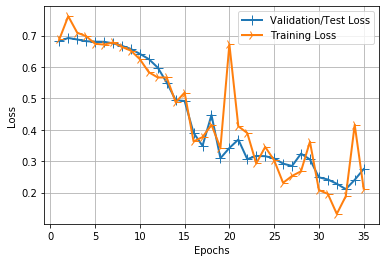

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

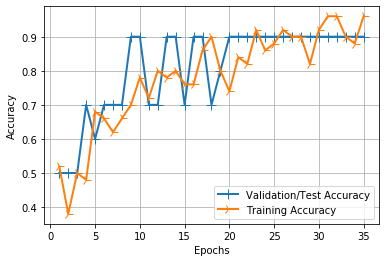

In [20]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()
